# EMG_Analysis
You have been provided with a data file in Blackboard named "<font color=red>**Toy_Dataset.csv**</font>". Please, use the dataset and try the perform the following operations



In [34]:
# Ernesto Hernandez-Hinojosa RJI284
#Import Libraries
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
# inline plotting in jupyter notebook
%matplotlib inline

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
Data = np.genfromtxt("02.txt", skip_header = 1)
print(Data)

[[ 1.0000e+00  1.0000e-05 -2.0000e-05 ...  0.0000e+00 -1.0000e-05
   0.0000e+00]
 [ 5.0000e+00  1.0000e-05 -2.0000e-05 ...  0.0000e+00 -1.0000e-05
   0.0000e+00]
 [ 6.0000e+00 -1.0000e-05  1.0000e-05 ... -1.0000e-05  1.0000e-05
   0.0000e+00]
 ...
 [ 6.5659e+04 -1.0000e-05  1.0000e-05 ... -1.0000e-05 -4.0000e-05
   0.0000e+00]
 [ 6.5660e+04 -1.0000e-05  1.0000e-05 ... -1.0000e-05 -4.0000e-05
   0.0000e+00]
 [ 6.5661e+04 -1.0000e-05  1.0000e-05 ... -1.0000e-05 -4.0000e-05
   0.0000e+00]]


Number of Observations: 63196
Number of Variables: 11
[ 1.8618e+04 -1.4000e-04 -2.9000e-04 -3.6000e-04 -4.7000e-04 -7.5000e-04
 -6.6000e-04 -1.0000e-04 -1.0000e-04  4.0000e+00  8.0000e+00]
[[ 1.8614e+04 -1.4000e-04 -2.9000e-04 ... -1.0000e-04  4.0000e+00
   8.0000e+00]
 [ 1.8615e+04 -1.4000e-04 -2.9000e-04 ... -1.0000e-04  4.0000e+00
   8.0000e+00]
 [ 1.8616e+04 -1.4000e-04 -2.9000e-04 ... -1.0000e-04  4.0000e+00
   8.0000e+00]
 ...
 [ 2.0402e+04 -2.0000e-05 -5.0000e-05 ... -5.0000e-05  4.0000e+00
   8.0000e+00]
 [ 2.0403e+04 -2.0000e-05 -5.0000e-05 ... -5.0000e-05  4.0000e+00
   8.0000e+00]
 [ 2.0404e+04 -2.0000e-05 -5.0000e-05 ... -5.0000e-05  4.0000e+00
   8.0000e+00]]
[18614. 18615. 18616. ... 20402. 20403. 20404.]
here
[-2.e-05 -2.e-05 -2.e-05 -2.e-05  0.e+00 -4.e-05  1.e-05 -8.e-05 -8.e-05
 -8.e-05 -1.e-05 -2.e-05 -2.e-05 -2.e-05 -2.e-05 -2.e-05 -2.e-05 -2.e-05
 -2.e-05]


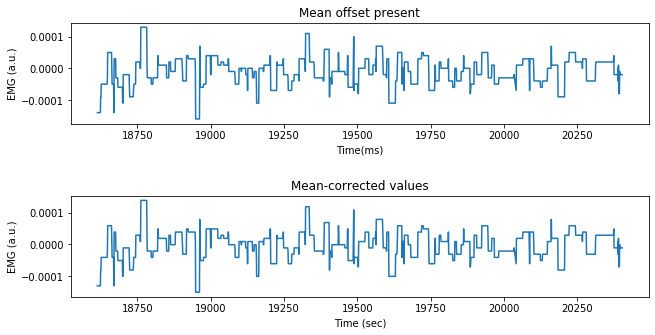

In [36]:
# Import Data Files (25%)
# Read the dataset provided in Blackboard for Toys
Data = np.genfromtxt("EMG_01.csv", delimiter=",", skip_header = 1) # Doesn't read the header
# Check the Size of the data set
print('Number of Observations:', Data.shape[0])
print('Number of Variables:', Data.shape[1])

G = 2; #gesture to be imported
ma=100; #set the moving average length

x1 = Data[Data[:,10]==G]  #import all columns in rows with G value in column 11 (10)
print(x1[4,:])
x1m1 = Data[Data[:,10]==G-1] #import all columns in rows with G-1 value
x1ma=np.vstack((x1m1[-ma:-1],x1)) #add rows before x1 to account for moving average
#x1 = np.absolute(x1)
print(x1)
#x1_int=np.trapz(x1[:,1],x1[:,0])
#print(x1_int)
time1 = x1[:,0]
time1ma = x1ma[:,0]
x11=x1[:,1]
x11ma = x1ma[:,1]
print(time1)
emg_correction11 = x11-np.mean(x11)
emg_correction11ma = x11ma-np.mean(x11ma)
fig=plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Mean offset present')
plt.plot(time1, x11)
plt.xlabel('Time(ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Mean-corrected values')
plt.plot(time1, emg_correction11)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig2.png'
fig.set_size_inches(w=10,h=5)

print('here')

print(x11[-20:-1])






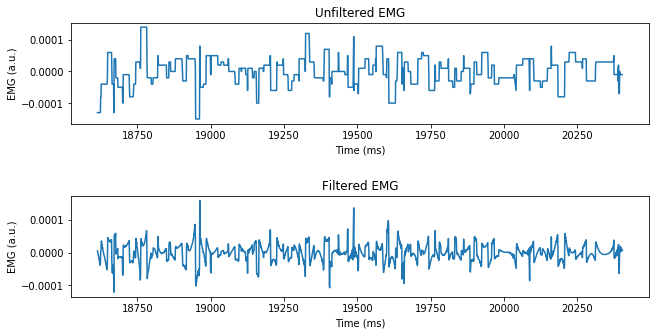

In [37]:
import scipy as sp
from scipy import signal

#create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2) #divide by two because this is the Nyquist frequency
# Design an Nth order Butterworth filter and return the filter coefficients (B,A) form. 
# 4th order Butterworth filters are quire common
b, a = sp.signal.butter(4, [high, low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered11 = sp.signal.filtfilt(b, a, emg_correction11)
emg_filtered11ma = sp.signal.filtfilt(b,a, emg_correction11ma)

# plot comparison of unfiltered vs filered mean-corrected EMG
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unfiltered EMG')
plt.plot(time1, emg_correction11)
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Filtered EMG')
plt.plot(time1, emg_filtered11)
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig3.png'
fig.set_size_inches(w=10,h=5)

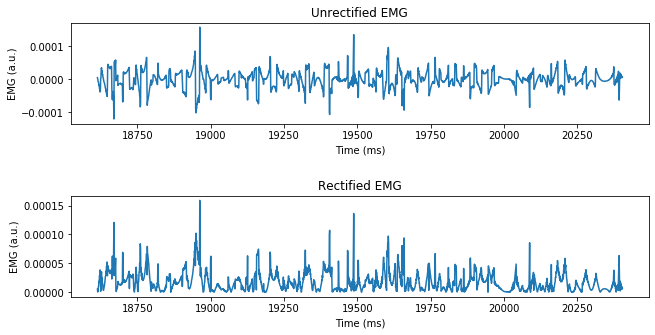

In [38]:
# process EMG signal: rectify
emg_rectified11 = abs(emg_filtered11)
emg_rectified11ma = abs(emg_filtered11ma)

# plot comparison of unrectfied vs rectified
fig = plt.figure()
plt.subplot(2,1,1)
plt.subplot(2,1,1).set_title('Unrectified EMG')
plt.plot(time1, emg_filtered11)
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

plt.subplot(2,1,2)
plt.subplot(2,1,2).set_title('Rectified EMG')
plt.plot(time1, emg_rectified11)
plt.xlabel('Time (ms)')
plt.ylabel('EMG (a.u.)')

fig.tight_layout()
fig_name = 'fig4.png'
fig.set_size_inches(w=10,h=5)



In [39]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


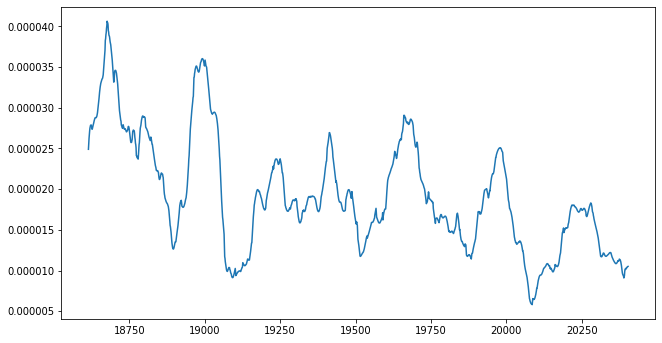

In [41]:
a = emg_rectified11ma

ma_11 = moving_average(a, ma)
#ma_11 = np.append([a[0:ma-1]],[ma_11[:]])

fig = plt.figure()
plt.plot(time1, ma_11)
fig.tight_layout()
fig_name = 'fig5.png'
fig.set_size_inches(w=10,h=5)




In [33]:
print(x11)

[-1.4e-04 -1.4e-04 -1.4e-04 ... -2.0e-05 -2.0e-05 -2.0e-05]


6.329399777260312e-06
[]
0


ValueError: zero-size array to reduction operation maximum which has no identity

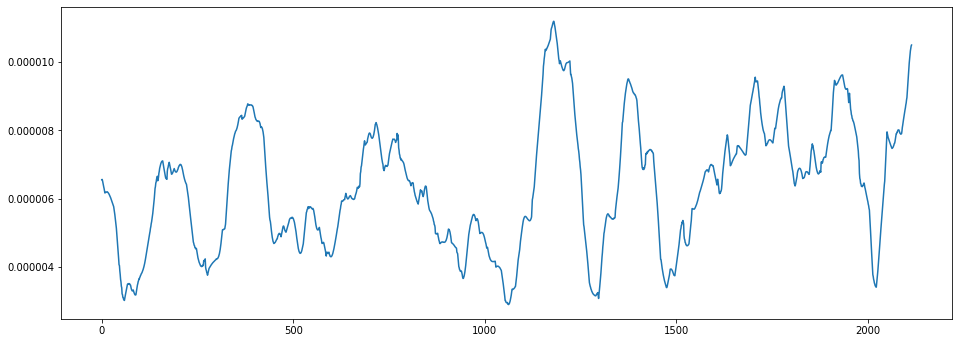

In [10]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths

peaks_ma,properties =find_peaks(ma_11, height=[0.0001,0.0006], width = 20)

fig = plt.figure()
plt.plot(ma_11)
plt.plot(peaks_ma, ma_11[peaks_ma], "x")
fig.tight_layout()
fig_name = 'fig6.png'
fig.set_size_inches(w=15,h=5)

mean_ma11 = np.average(ma_11)
print(mean_ma11)
print(peaks_ma)

num_peaks = np.size(peaks_ma)
print(num_peaks)

max_peak = properties["peak_heights"].max()
print(max_peak)

#spcing 
peak_dist = np.ediff1d(peaks_ma)

peak_dist


In [166]:
#Find peak width 
results_half = peak_widths(ma_11, peaks_ma, rel_height=0.0001)
results_half[0] #widths 
results_full = peak_widths(ma_11, peaks_ma, rel_height=0.0005)
results_full[0] #widths 


array([0.00197469, 0.00113662, 0.00094187, 0.00297422, 0.00095799,
       0.00056369, 0.01069307, 0.00050396, 0.19036921, 0.00070568,
       0.00060705, 0.00063023])

In [167]:
results_half[0]

array([0.00039494, 0.00022732, 0.00018837, 0.00059484, 0.0001916 ,
       0.00011274, 0.00213861, 0.00010079, 0.03807384, 0.00014114,
       0.00012141, 0.00012605])

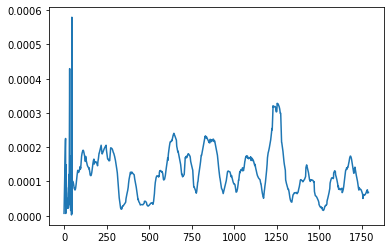

In [160]:
plt.plot(ma_11)
#plt.plot(peaks_ma, ma_11[peaks_ma], "x")
plt.hlines(*results_half[1:], color="C2")
plt.hlines(*results_full[1:], color="C3")
plt.show()